# Homework 4

Submitted by: Hang Tian

Submission date: 10/04/23

**Instructions:** You will process and analyze a large data set that contains crimes reported in the city of Chicago from 2018 to 2021.

To load the data set and get the *crimes* dataframe correctly configured, execute the cells with the code provided in this notebook. This could take a few minutes after you start the execution of the code cells.

Once the *crimes* dataframe has been setup proceed to obtain 2 meaningful data analysis results from processing the *crimes* dataframe. Specific cells have been provided for you to describe the results of each of your data analysis procedures. You can add as many code cells as you want to complete each of your analysis and I also recommend that you add some explanatory cells (use Markdown) to provide some additional text with explanations of your analysis.


In [2]:
#EXECUTE THIS CELL to setup the modules you need
%matplotlib inline
import pandas as pd
import numpy as np

In [1]:
#Defining location of dataset 
filepath="~/datasets/ist652/Crimes/crimes_2018_2021.csv"
localpath='crimes_2018_2021.csv'

In [30]:
#EXECUTE THIS CELL to load the dataset into your environment - THIS WILL TAKE 3 TO 5 MINUTES - be patient
# a security warning will appear. You can ignore it.
crimes=pd.read_csv(localpath,parse_dates=[2])
crimes.head()  #just checking

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
1,11645648,JC212959,2018-01-01 08:00:00,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,30.0,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
2,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,11645557,JC212685,2018-04-01 00:01:00,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,6.0,44.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
4,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN


# Code for data analysis 1

You can place the code for your first data analysis result in this section. Add as many code cells as you need.

In [31]:
crimes.info()
# It seems there are lots of crime cases without location information, I'll drop those just in case there will be location-related analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946893 entries, 0 to 946892
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    946893 non-null  int64         
 1   Case Number           946893 non-null  object        
 2   Date                  946893 non-null  datetime64[ns]
 3   Block                 946893 non-null  object        
 4   IUCR                  946893 non-null  object        
 5   Primary Type          946893 non-null  object        
 6   Description           946893 non-null  object        
 7   Location Description  942727 non-null  object        
 8   Arrest                946893 non-null  bool          
 9   Domestic              946893 non-null  bool          
 10  Beat                  946893 non-null  int64         
 11  District              946893 non-null  int64         
 12  Ward                  946854 non-null  float64       
 13 

In [84]:
crimes_ordered=crimes.sort_index(ascending=True)
crimes_ordered.drop(crimes_ordered[np.isnan(crimes_ordered['Latitude'])].index, inplace=True)
crimes_ordered.set_index("Date",inplace=True)
crimes_ordered=crimes_ordered.sort_index(ascending=True)
crimes_ordered.shape[0]

934034

<AxesSubplot:xlabel='Date'>

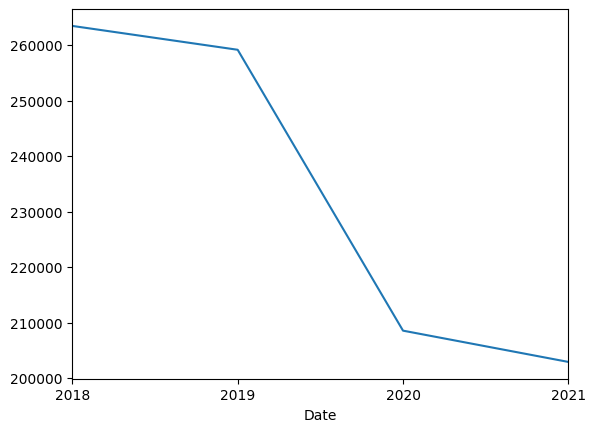

In [77]:
# Annual change
annual_count=crimes_ordered['Case Number'].resample('Y').count()
annual_count.plot()
# Case numbers through years is getting less. There is a dramatic drop from 2019 to 2020.

<AxesSubplot:xlabel='month'>

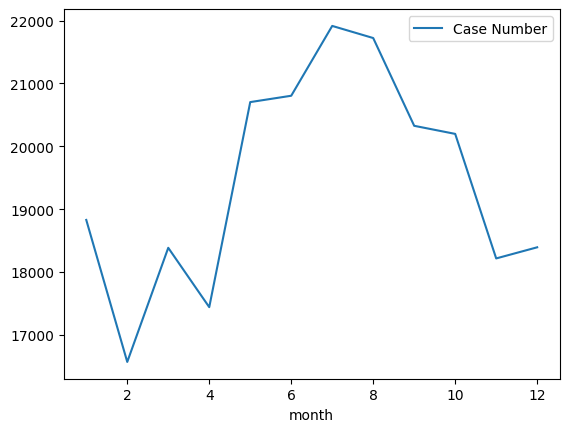

In [76]:
# Monthly average change
monthly=crimes_ordered['Case Number'].resample('M').count().to_frame()
monthly.reset_index(inplace=True)
monthly['month']=monthly['Date'].dt.month
month_average=monthly.groupby(['month']).agg('mean')
month_average.plot()
# On average, crime cases count is high from May to October, while summer months (Jult - August) see the peak.

## Description of data analysis result 1

Use the next cell to describe your data analysis result 1

### Result 1
Gnerally speaking, total crime cases decreases through these years. On average, warmer months have more crime cases.

# Code for data analysis 2

You can place the code for your second data analysis result in this section. Add as many code cells as you need.

In [100]:
# What is the crime type that causes higher proportion of people being arrested
total_type_list=crimes_ordered['Primary Type'].unique()
crimes_arrested=crimes_ordered[crimes_ordered['Arrest']==True]
print('The ratio of crime cases having people arrested is',crimes_arrested.shape[0]/crimes_ordered.shape[0])
print(f'There are a total of {total_type_list.shape[0]} primary crime types')
arrested_types=crimes_arrested['Primary Type'].unique()
print(f'There are only {arrested_types.shape[0]} primary crime types involved with people arrested')
type_not_seen_arrested=list(set(total_type_list)-set(arrested_types))[0]
print(f'The only crime type through these records not involved with people arrested is {type_not_seen_arrested}')

The ratio of crime cases having people arrested is 0.1787536642135083
There are a total of 34 primary crime types
There are only 33 primary crime types involved with people arrested
The only crime type through these records not involved with people arrested is RITUALISM


In [125]:
crimes_arrest_by_type_table=crimes_ordered.groupby(['Primary Type','Arrest'])['Case Number'].count().to_frame()
crimes_total_by_type_table=crimes_ordered.groupby(['Primary Type'])['Case Number'].count().to_frame()
crimes_arrest_by_type_table.reset_index(inplace=True)
crimes_total_by_type_table.reset_index(inplace=True)
crimes_total_by_type_table.columns=['Primary Type','Total Case Number']
crime_count_table=pd.merge(crimes_arrest_by_type_table,crimes_total_by_type_table,on='Primary Type')
crime_count_table.set_index('Primary Type',inplace=True)
crime_count_table['Proportion']=crime_count_table['Case Number']/crime_count_table['Total Case Number']
crime_arrested_proportion=crime_count_table[crime_count_table['Arrest']==True].sort_values('Proportion',ascending=False).iloc[:,3].to_frame()
crime_arrested_proportion
# Liquor law violation and public indencency have the highest arrested rate of 100%, 
# followed by prostitution, narcotics, gambling, concealed carry license violation and interference with public officer
# that have a arrested proportion of more than 90%.
# The bottom 3 is intimidation, deceptive practice and human trafficking

,Proportion
Primary Type,
LIQUOR LAW VIOLATION,1.000000
PUBLIC INDECENCY,1.000000
PROSTITUTION,0.998303
NARCOTICS,0.996731
GAMBLING,0.994751
CONCEALED CARRY LICENSE VIOLATION,0.972303
INTERFERENCE WITH PUBLIC OFFICER,0.942363
OBSCENITY,0.786611
WEAPONS VIOLATION,0.652416


## Description of data analysis result 2

Use the next cell to describe your data analysis result 2

### Result 2
#### About crime types invovled with people arrested
The ratio of crime cases involved with people arrested among all the records is 17.9%.
There are a total of 34 primary crime types, while only 33 primary crime types are involved with people arrested.
The only crime type through these records not involved with people arrested is ritualism.
#### Which crime types have higher arrest rate?
Liquor law violation and public indencency have the highest arrested rate of 100%, 
followed by prostitution, narcotics, gambling, concealed carry license violation and interference with public officer
that have a arrested proportion of more than 90%.
The bottom 3 is intimidation, deceptive practice and human trafficking

**Note:** PLEASE SUBMIT YOUR HOMEWORK IN *ipynb* AND *pdf* formats. Use the "Download as" option in the "File" menu to get your download the notebook in those formats.